# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [318]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [319]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [320]:
# https://stackoverflow.com/questions/50331463/convert-rgba-to-rgb-in-python/50332356

def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

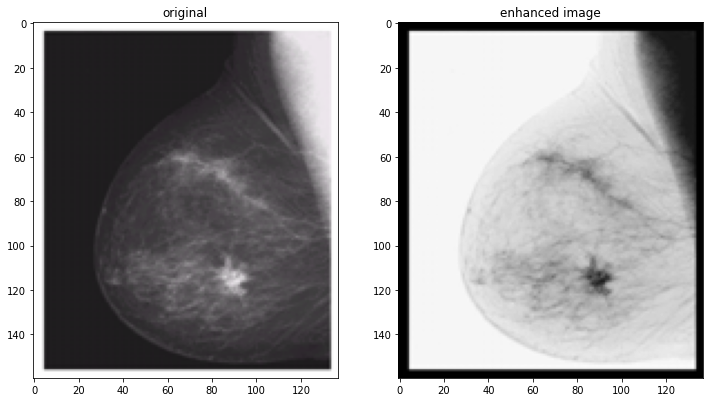

In [321]:
'''
1
Negative Transformation
'''
def Negative_transformation(img):

    if (img.shape[2]>3): #rgba
        gray = rgba2rgb(img)
        gray = rgb2gray(gray)
    else:
        gray = rgb2gray(img)
    enhanced_img = 255 - gray
    show_images([img,enhanced_img],["original","enhanced image"])

for img in ["imgs/Picture1.png"]:
    img = io.imread(img)
    Negative_transformation(img)

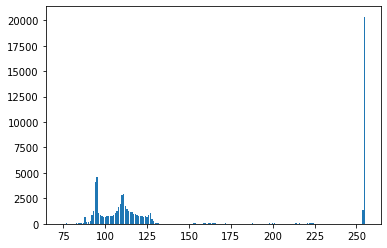

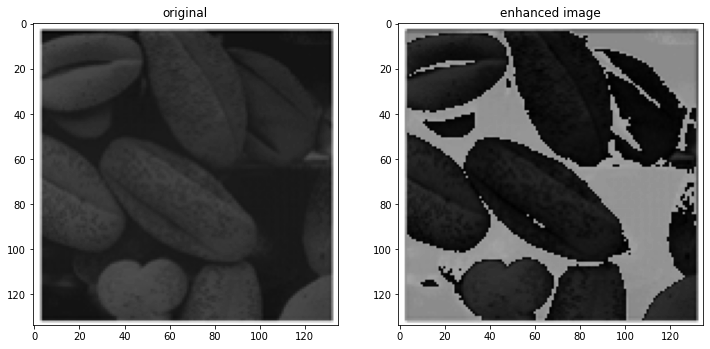

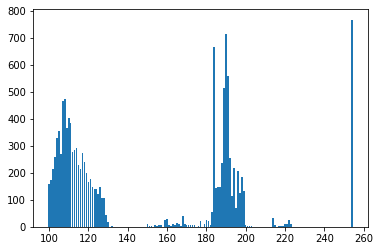

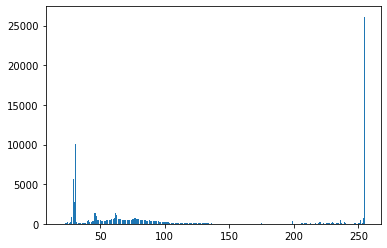

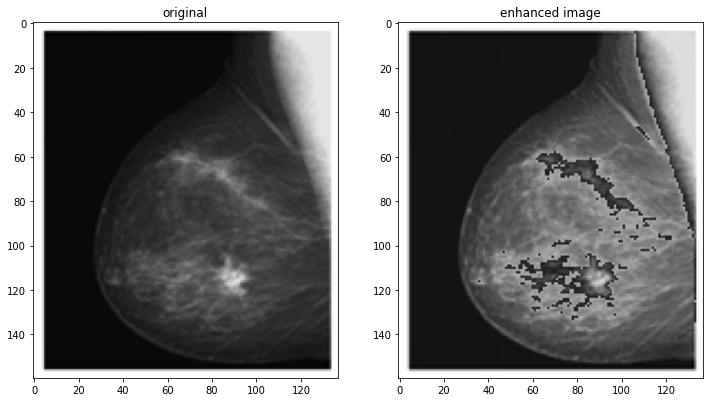

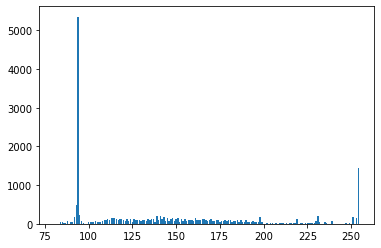

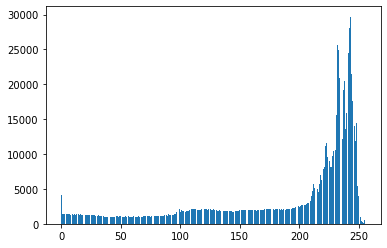

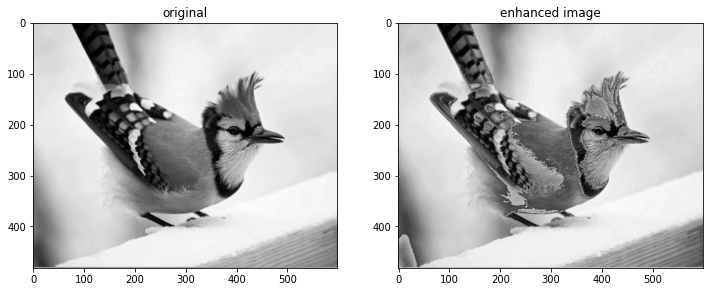

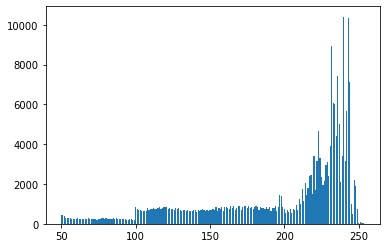

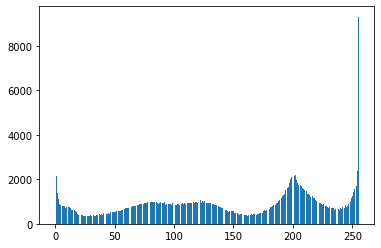

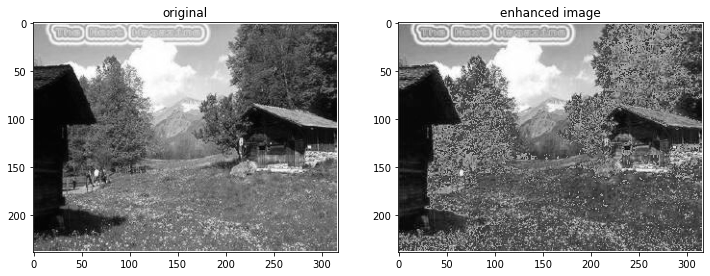

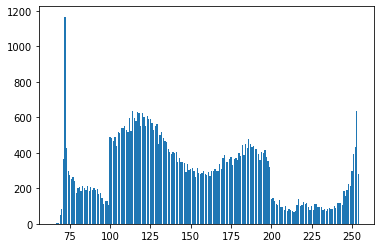

In [322]:
'''
2
Contrast Enhancement
'''

def contrast_enhancement(imag):
    img = rgb2gray(imag)
    img[:,:] = 255 * img[:,:]
    enhanced_img = np.copy(img)
    enhanced_img = np.where(enhanced_img<=(100),(1.5)*enhanced_img+(50),enhanced_img)
    show_images([img,enhanced_img],["original","enhanced image"])
    
    showHist(enhanced_img)


for img in ["imgs/Picture2.png","imgs/Picture1.png",'imgs/bird.jpg','2.jpg']:

    img = io.imread(img)
    showHist(img)
    img = rgba2rgb(img)
    contrast_enhancement(img)



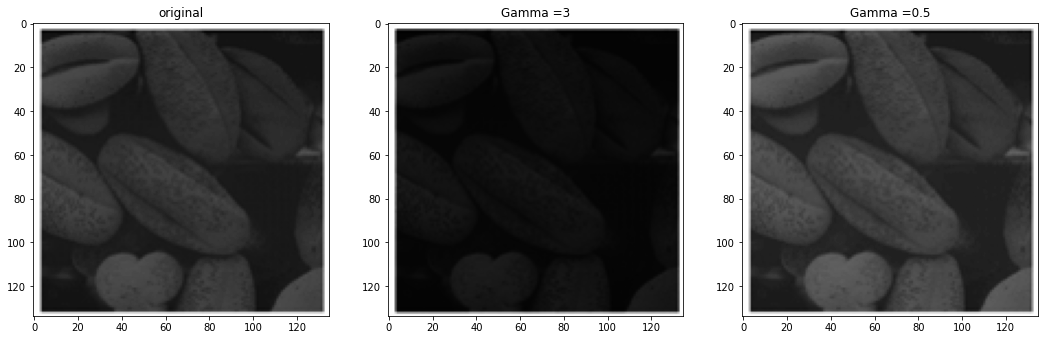

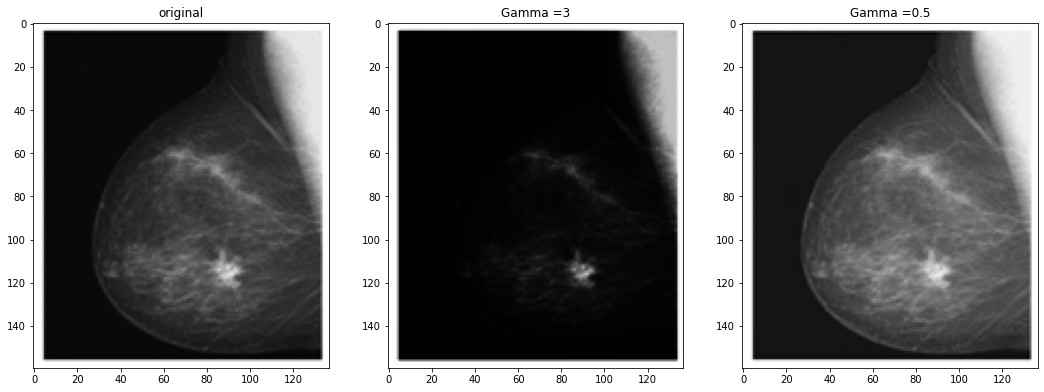

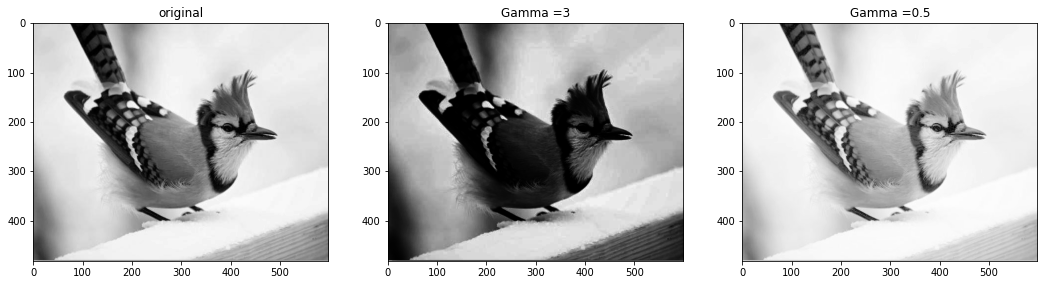

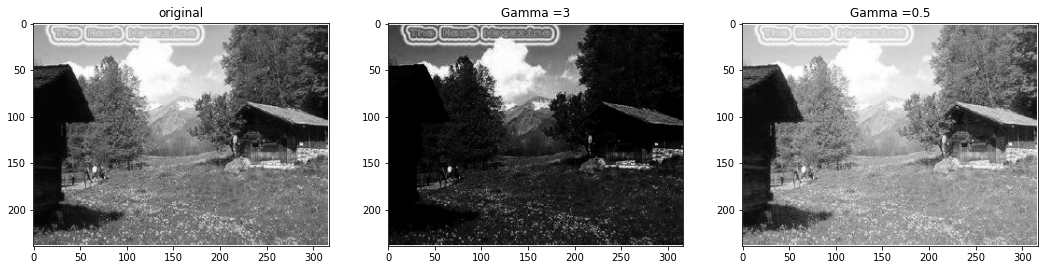

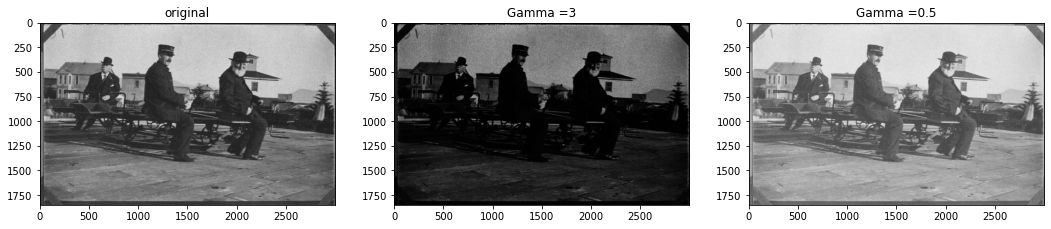

In [323]:
'''
3
Gamma Correction
'''
from skimage import exposure
def Gamma_Correction(img, gamma1,gamma2,c):
    enhanced_img1,enhanced_img2 = np.copy(img),np.copy(img)
    enhanced_img1 = np.where(True,pow(enhanced_img1,gamma1)*c,0)
    enhanced_img2 = np.where(True,pow(enhanced_img2,gamma2)*c,0)
    show_images([img,enhanced_img1,enhanced_img2],["original","Gamma ="+ str(gamma1),"Gamma ="+ str(gamma2)])

for img in ['imgs/Picture2.png',"imgs/Picture1.png",'imgs/bird.jpg','2.jpg','1.jpg']:
    img = io.imread(img)
    if (len(img.shape)==3 and img.shape[2] >3): img = rgba2rgb(img)
    img = rgb2gray(img)
    Gamma_Correction(img,3,0.5,1)
    

# to test the implementation use adjust gamma from the library :
# print("Built in functions")
# show_images([img,exposure.adjust_gamma(img, 3)],["original","Gamma = 3"]) 
# show_images([img,exposure.adjust_gamma(img, 0.5)],["original","Gamma = 0.5"]) 
    



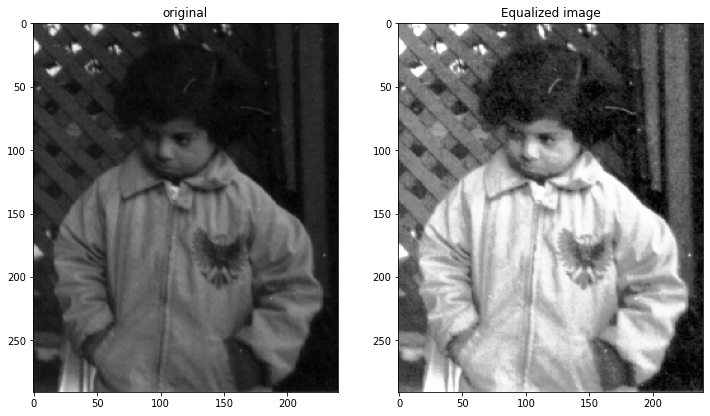

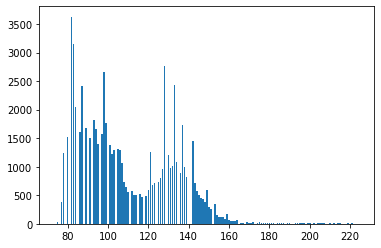

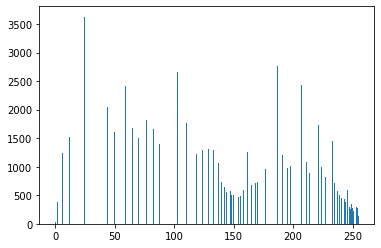

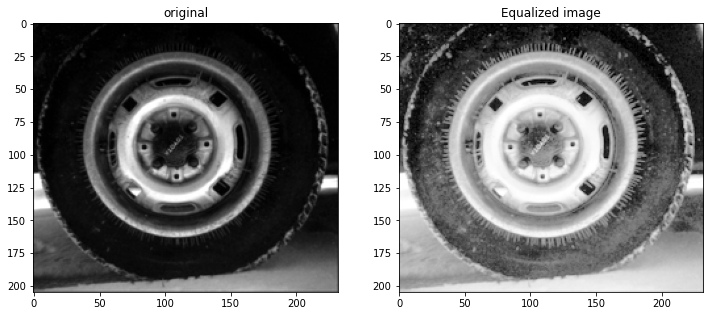

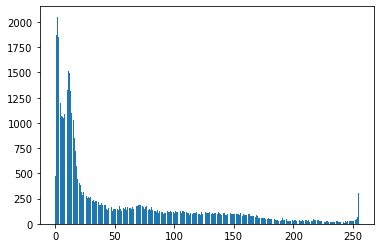

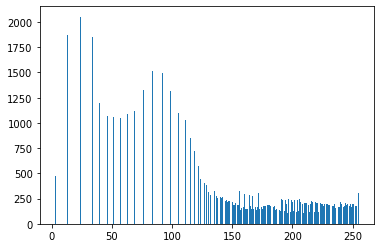

In [325]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
G = 256
def Histogram_equalization(img):
    # calculate histogram
    hist = histogram(img) 
    
    H = np.zeros(G)
    for i in range (len(hist[0])):
        H[hist[1][i]] = hist[0][i]

    
    # cummlative histogram
    H_C = np.copy(H)
    for i in range(1,256):
        H_C[i] = H_C[i]+ H_C[i-1]
    
    mapping_array=np.round(255*H_C/(img.shape[0]*img.shape[1]))
    img_1D = np.copy(img)
    img_1D = np.reshape(img_1D,(1,img.shape[0]*img.shape[1]))
    
    for i in range(img_1D.shape[1]):
        index=img_1D[0,i]
        img_1D[0,i]=mapping_array[index] 

    img_1D=np.reshape(img_1D,(img.shape[0],img.shape[1]))

    show_images([img, img_1D],["original","Equalized image"])
    showHist(img)
    showHist(img_1D)

def getImageWithHist(name,ext,nbins=256):
    pass

for img in ["imgs/pout.tif","imgs/tire.tif"]:
    img=io.imread(img,as_gray=True)
    Histogram_equalization(img)
    # equalized = exp.equalize_hist(img, 256)
    # show_images([img, equalized],["original","Equalized image"])